# Import

In [1]:
import time
import pandas as pd
from dotenv import load_dotenv
import os
import openai
from openai import OpenAI
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize variables

In [2]:
load_dotenv()
API_KEY = os.getenv("API_KEY")

In [3]:
client = OpenAI(
  api_key=API_KEY
)

In [6]:
decisions = ['unacceptable', 'acceptable', 'good', 'very good']

In [57]:
buying_price = None
maintenance_cost = None
number_of_doors = None
number_of_persons = None
lug_boot = None
safety = None

# Make API calls

## Case decision = unacceptable

In [18]:
# conditions
buying_price = 'high'
maintenance_cost = 'high'
number_of_doors = 3
number_of_persons = 4
lug_boot = 'medium'
safety = 'medium'

# list to store agents' answers
unacceptable_answers = []

In [19]:
system_message = "You are an AI agent tasked with evaluating cars based on specific conditions. You will choose one of the following evaluations: unacceptable, acceptable, good, very good. You must provide only one evaluation, without any additional explanation."
user_message = f"Given the following car conditions:\n- Buying price: {buying_price}\n- Maintenance cost: {maintenance_cost}\n- Number of doors: {number_of_doors}\n- Number of persons it can carry: {number_of_persons}\n- Size of the luggate boot: {lug_boot}\n- Car safety level: {safety}\nChoose one of the following evaluations for this car:\n- unacceptable\n- acceptable\n- good\n- very good\nYour response should be one of the 4 above options, without any other words."
messages = [
    {"role": "system", "content": system_message},
    {"role": "user", "content": user_message}
]

In [20]:
# make 100 api calls
for _ in range (100):
    completion = client.chat.completions.create(
        model="gpt-4o-mini",
        messages=messages
    )
    # store answer
    unacceptable_answers.append(completion.choices[0].message.content)

RateLimitError: Error code: 429 - {'error': {'message': 'Rate limit reached for gpt-4o-mini in organization org-1meyn5V20pPUqstKQh1MYsvW on requests per day (RPD): Limit 200, Used 200, Requested 1. Please try again in 7m12s. Visit https://platform.openai.com/account/rate-limits to learn more.', 'type': 'requests', 'param': None, 'code': 'rate_limit_exceeded'}}

In [108]:
unacceptable_results = [unacceptable_answers.count(decision) for decision in decisions]
unacceptable_results

[100, 0, 0, 0]

## Case unacceptable with default = acceptable

In [ ]:
# conditions
buying_price = 'high'
maintenance_cost = 'high'
number_of_doors = 3
number_of_persons = 4
lug_boot = 'medium'
safety = 'medium'

# list to store agents' answers
unacceptable_with_acceptable_as_default_answers = []

In [ ]:
system_message = "You are an AI agent tasked with evaluating cars based on specific conditions. You will choose one of the following evaluations: unacceptable, acceptable, good, very good. You must provide only one evaluation, without any additional explanation. The default evaluation is 'acceptable'. However, you should carefully analyze the car's conditions and change the evaluation if needed."
user_message = f"Given the following car conditions:\n- Buying price: {buying_price}\n- Maintenance cost: {maintenance_cost}\n- Number of doors: {number_of_doors}\n- Number of persons it can carry: {number_of_persons}\n- Size of the luggate boot: {lug_boot}\n- Car safety level: {safety}\nChoose one of the following evaluations for this car:\n- unacceptable\n- acceptable\n- good\n- very good\nYour response should be one of the 4 above options, without any other words."
messages = [
    {"role": "system", "content": system_message},
    {"role": "user", "content": user_message}
]

In [ ]:
for _ in range (100):
    completion = client.chat.completions.create(
        model="gpt-4o-mini",
        messages=messages
    )
    unacceptable_with_acceptable_as_default_answers.append(completion.choices[0].message.content)

In [ ]:
unacceptable_with_acceptable_as_default_results = [unacceptable_with_acceptable_as_default_answers.count(decision) for decision in decisions]
unacceptable_with_acceptable_as_default_results

[100, 0, 0, 0]

## Case acceptable

In [ ]:
# conditions
buying_price = 'medium'
maintenance_cost = 'medium'
number_of_doors = 4
number_of_persons = 4
lug_boot = 'medium'
safety = 'high'

# list to store agents' answers
acceptable_answers = []

In [44]:
for _ in range (100):
    completion = client.chat.completions.create(
        model="gpt-4o-mini",
        messages=messages
    )
    acceptable_answers.append(completion.choices[0].message.content)

In [68]:
acceptable_results = [acceptable_answers.count(decision) for decision in decisions]
acceptable_results

[0, 33, 67, 0]

## Case acceptable with default option = acceptable

In [25]:
# conditions
buying_price = 'medium'
maintenance_cost = 'medium'
number_of_doors = 4
number_of_persons = 4
lug_boot = 'medium'
safety = 'high'

# list to store agents' answers
acceptable_with_acceptable_as_default_answers = []

In [26]:
system_message = "You are an AI agent tasked with evaluating cars based on specific conditions. You will choose one of the following evaluations: unacceptable, acceptable, good, very good. You must provide only one evaluation, without any additional explanation. The default evaluation is 'acceptable'. However, you should carefully analyze the car's conditions and change the evaluation if needed."
user_message = f"Given the following car conditions:\n- Buying price: {buying_price}\n- Maintenance cost: {maintenance_cost}\n- Number of doors: {number_of_doors}\n- Number of persons it can carry: {number_of_persons}\n- Size of the luggate boot: {lug_boot}\n- Car safety level: {safety}\nChoose one of the following evaluations for this car:\n- unacceptable\n- acceptable\n- good\n- very good\nYour response should be one of the 4 above options, without any other words."
messages = [
    {"role": "system", "content": system_message},
    {"role": "user", "content": user_message}
]

In [ ]:
for _ in range (99):
    completion = client.chat.completions.create(
        model="gpt-4o-mini",
        messages=messages
    )
    acceptable_with_acceptable_as_default_answers.append(completion.choices[0].message.content)

In [ ]:
acceptable_with_acceptable_as_default_results = [acceptable_with_acceptable_as_default_answers.count(decision) for decision in decisions]
acceptable_with_acceptable_as_default_results

[0, 21, 79, 0]

# Store results to data frame

In [ ]:
#unacceptable_results = [100, 0, 0, 0]
#unacceptable_with_acceptable_as_default_results = [100, 0, 0, 0]
#acceptable_results = [0, 33, 67, 0]
#acceptable_with_acceptable_as_default_results = [0, 21, 79, 0]

In [ ]:
columns = ['true_evaluation', 'default', 'n_unacceptable', 'n_acceptable', 'n_good', 'n_very_good']
df = pd.DataFrame(columns=columns)
row_unacceptable = ['unacceptable', None] + unacceptable_results
row_unacceptable_with_default = ['unacceptable', 'acceptable'] + unacceptable_results
row_acceptable = ['acceptable', None] + acceptable_results
row_acceptable_with_default = ['acceptable', 'acceptable'] + acceptable_with_acceptable_as_default_results
new_rows = pd.DataFrame([row_unacceptable, row_unacceptable_with_default, row_acceptable, row_acceptable_with_default], columns=df.columns)
df = pd.concat([df, new_rows], ignore_index=True)
df

,true_evaluation,default,n_unacceptable,n_acceptable,n_good,n_very_good
0,unacceptable,None,100,0,0,0
1,unacceptable,acceptable,100,0,0,0
2,acceptable,None,0,33,67,0
3,acceptable,acceptable,0,21,79,0


In [43]:
df.to_csv('data/result.csv', index=False)

In [47]:
df.iloc[0]

true_evaluation       unacceptable
default                       None
n_unacceptable                 100
n_acceptable                     0
n_good                           0
n_very_good                      0
total                          100
n_unacceptable_pct           100.0
n_acceptable_pct               0.0
n_good_pct                     0.0
n_very_good_pct                0.0
Name: 0, dtype: object

/tmp/ipykernel_2228/1505568189.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


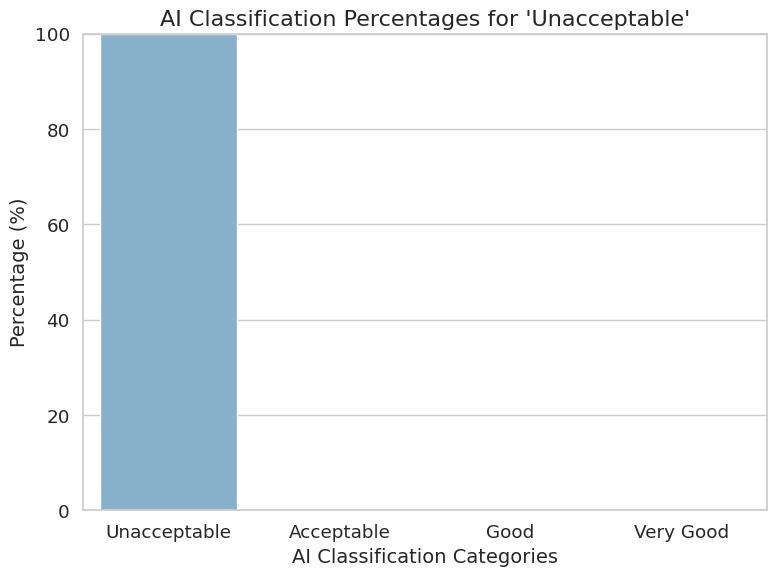

/tmp/ipykernel_2228/1505568189.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


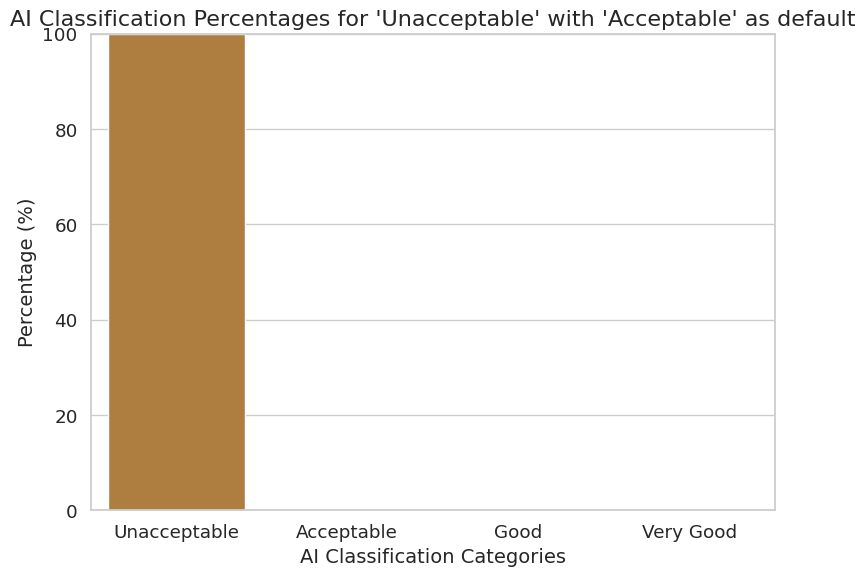

/tmp/ipykernel_2228/1505568189.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


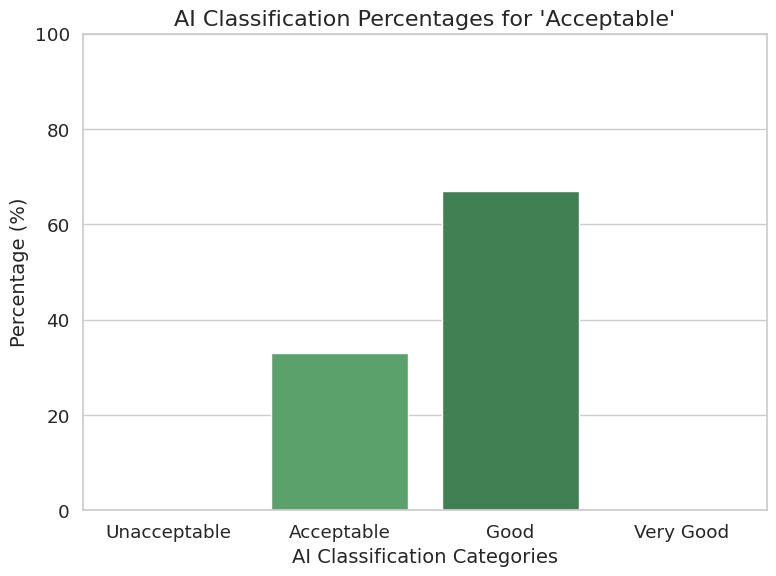

/tmp/ipykernel_2228/1505568189.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


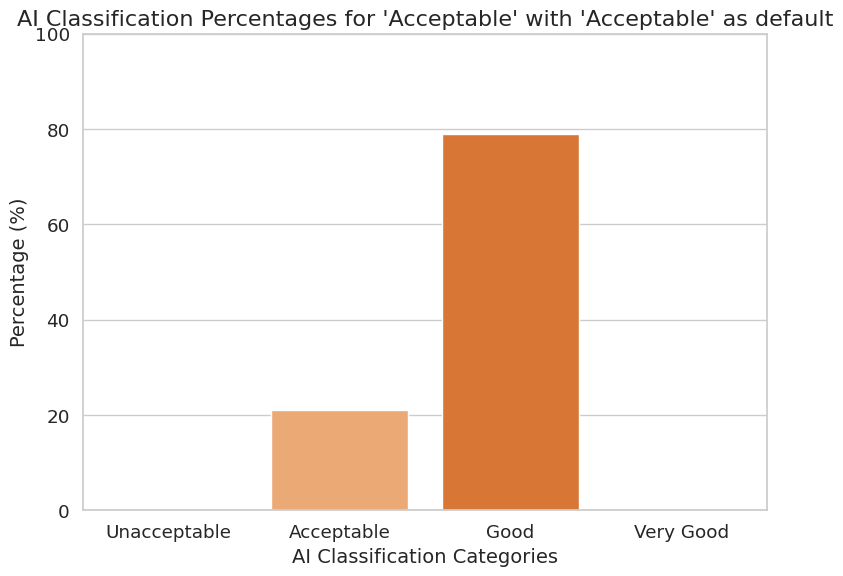

In [50]:
category_columns = ["n_unacceptable", "n_acceptable", "n_good", "n_very_good"]
df["total"] = df[category_columns].sum(axis=1)
for col in category_columns:
    df[col + "_pct"] = (df[col] / df["total"]) * 100

sns.set(style="whitegrid", palette="muted", font_scale=1.2)

# Plot for "unacceptable" row
plt.figure(figsize=(8, 6))
sns.barplot(
    x=["Unacceptable", "Acceptable", "Good", "Very Good"],
    y=df.iloc[0][[col + "_pct" for col in category_columns]].values,
    palette="Blues_d"
)
plt.title("AI Classification Percentages for 'Unacceptable'", fontsize=16)
plt.ylabel("Percentage (%)", fontsize=14)
plt.xlabel("AI Classification Categories", fontsize=14)
plt.ylim(0, 100)
plt.tight_layout()
plt.show()

# Plot for "unacceptable" with "acceptable" as default row
plt.figure(figsize=(8, 6))
sns.barplot(
    x=["Unacceptable", "Acceptable", "Good", "Very Good"],
    y=df.iloc[1][[col + "_pct" for col in category_columns]].values,
    palette="BrBG"
)
plt.title("AI Classification Percentages for 'Unacceptable' with 'Acceptable' as default", fontsize=16)
plt.ylabel("Percentage (%)", fontsize=14)
plt.xlabel("AI Classification Categories", fontsize=14)
plt.ylim(0, 100)
plt.tight_layout()
plt.show()

# Plot for "acceptable" row
plt.figure(figsize=(8, 6))
sns.barplot(
    x=["Unacceptable", "Acceptable", "Good", "Very Good"],
    y=df.iloc[2][[col + "_pct" for col in category_columns]].values,
    palette="Greens_d"
)
plt.title("AI Classification Percentages for 'Acceptable'", fontsize=16)
plt.ylabel("Percentage (%)", fontsize=14)
plt.xlabel("AI Classification Categories", fontsize=14)
plt.ylim(0, 100)
plt.tight_layout()
plt.show()

# Plot for "acceptable" with "acceptable" as default row
plt.figure(figsize=(8, 6))
sns.barplot(
    x=["Unacceptable", "Acceptable", "Good", "Very Good"],
    y=df.iloc[3][[col + "_pct" for col in category_columns]].values,
    palette="Oranges"
)
plt.title("AI Classification Percentages for 'Acceptable' with 'Acceptable' as default", fontsize=16)
plt.ylabel("Percentage (%)", fontsize=14)
plt.xlabel("AI Classification Categories", fontsize=14)
plt.ylim(0, 100)
plt.tight_layout()
plt.show()